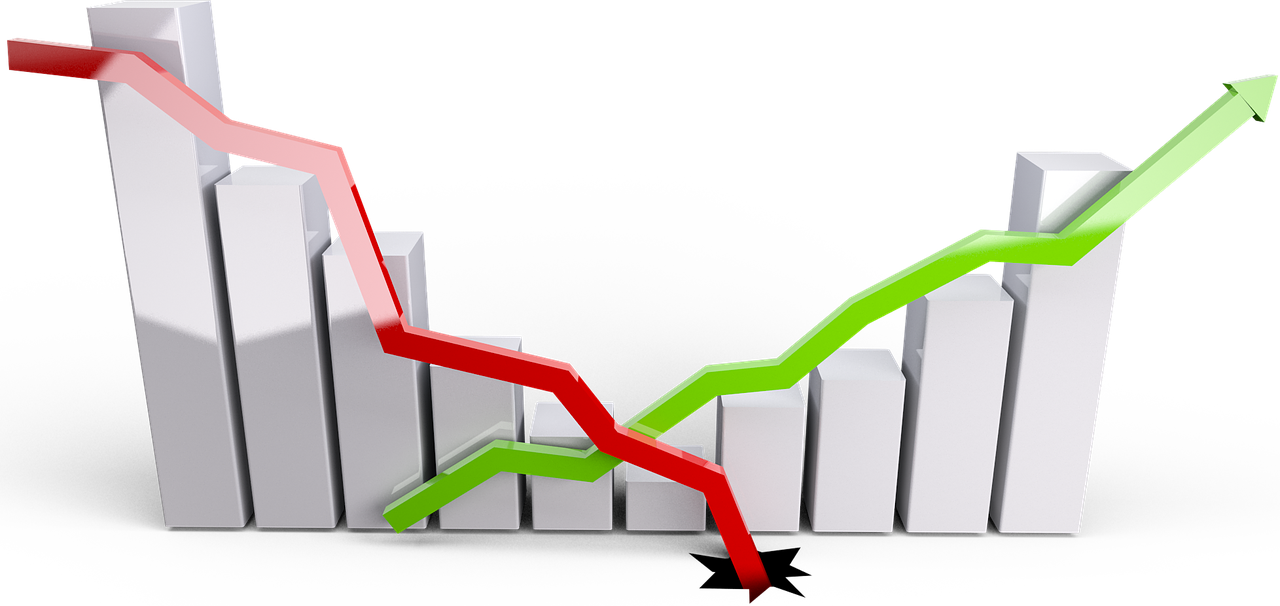

# Exploration 4. Stock Price Prediction
---
# (프로젝트) 주식 예측에 도전해 보자

## [루브릭]
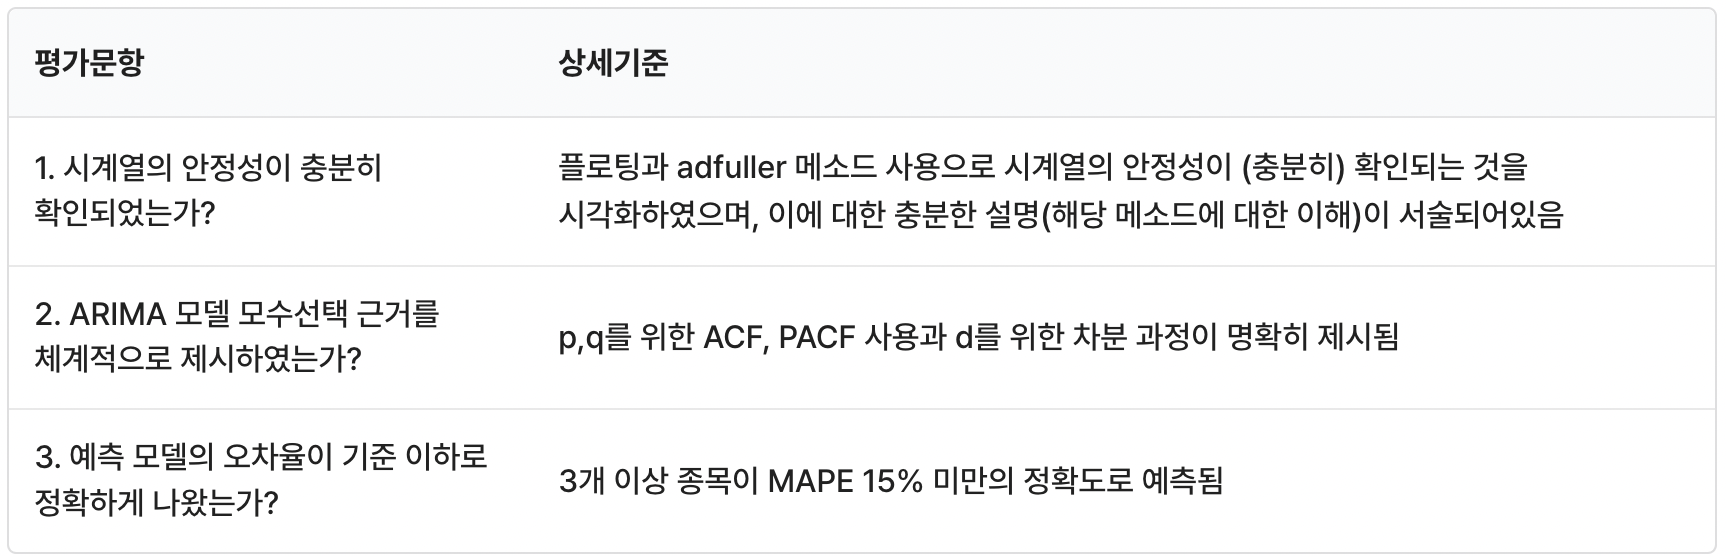

## STEP 1 : 시계열 데이터 준비

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.options.display.max_columns = 1000

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# data import
os.getcwd()

'/Users/joowanha/PycharmProjects/AIFFEL/datathon/project/aiffel_datathon'

In [3]:
os.listdir('/Users/joowanha/PycharmProjects/AIFFEL/stock_prediction')

['daily-min-temperatures.csv',
 'MSFT.csv',
 'airline-passengers.csv',
 '005930.KS.csv']

In [4]:
df_005930 = pd.read_csv('/Users/joowanha/PycharmProjects/AIFFEL/stock_prediction/005930.KS.csv', index_col='Date', parse_dates=True)

In [5]:
df_005930.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df_005930.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2020-05-18 to 2021-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [7]:
df_005930.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284


In [8]:
df_005930.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-12,80800.0,81200.0,79800.0,80000.0,80000.0,35812268
2021-05-13,78900.0,79600.0,78400.0,78500.0,78500.0,31490096
2021-05-14,79000.0,80300.0,78900.0,80100.0,80100.0,16450920
2021-05-17,80800.0,80900.0,79200.0,79600.0,79600.0,17740855
2021-05-18,79600.0,80000.0,79100.0,79600.0,79600.0,17265868


- 데이터 내용 확인  
제공된 데이터 셋은 005930.KS 는 삼성전자 주식이며, 2020면 5월 18 ~ 2021년 5월 18일까지 1년간 데이터가 담겨 있으며, 각 칼럼 데이터는 아래와 같습니다.   
Date : 해당 날짜  
Open : 시작가  
High : 최고가  
Low : 최저가  
Close : 종가  
Adj Close : 수정종가  
Volume : 거래량  

In [9]:
# Time Series 생성
ts = df_005930['Close']

In [10]:
ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

## STEP 2 : 각종 전처리 수행
- 결측치 처리
- 로그 변환

In [11]:
# 결측치 확인
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

결측치는 없는 것으로 확인됩니다.

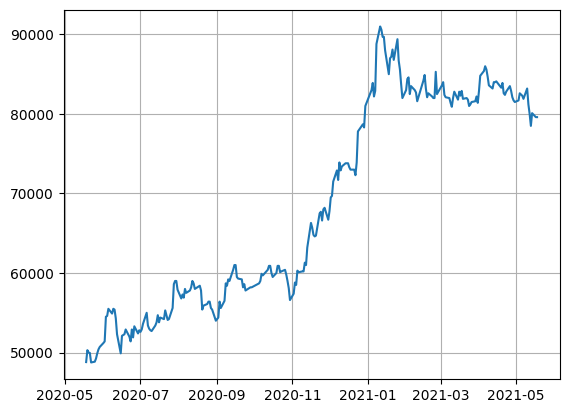

In [12]:
# 데이터 plot 확인
plt.grid()
plt.plot(ts)

In [13]:
# 금액의 단위가 커서 로그 변환
ts_log = np.log(ts)

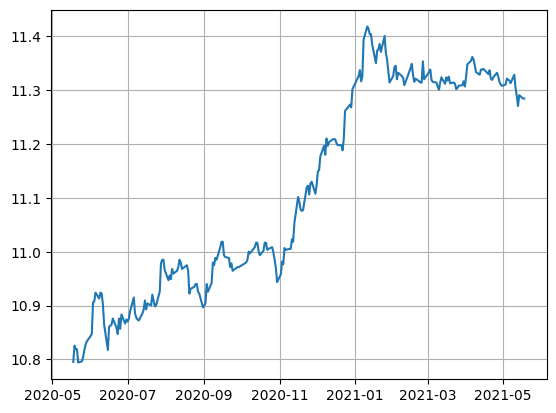

In [14]:
plt.grid()
plt.plot(ts_log)

## STEP 3 : 시계열 안정성 분석
- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [15]:
# 정성적 그래프 분석
def plot_rolling_statistics(timeseries, window=12):
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

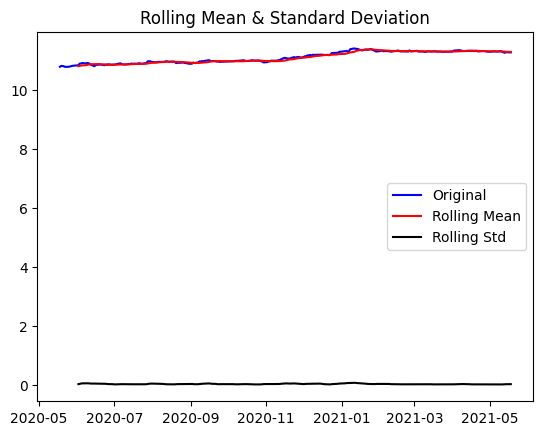

In [16]:
plot_rolling_statistics(ts_log, window=12)

평균과 분산이 거의 일정하게 안정적으로 나오는 것을 볼 수 있습니다. log를 취하기 전 원래 데이터의 경우의 추이도 다시 한번 확인해 보도록 하겠습니다. 

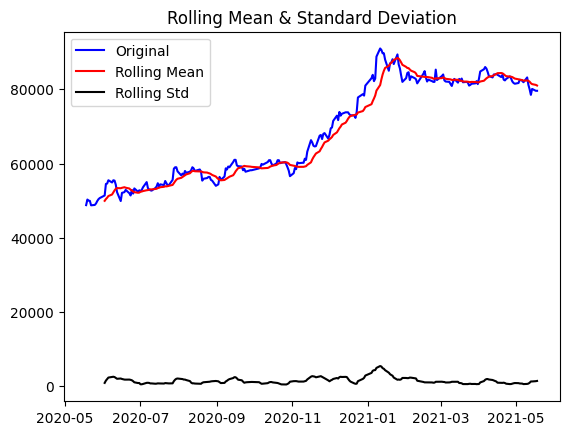

In [17]:
plot_rolling_statistics(ts, window=12)

확실히 로그를 취하고 난 이후 이동평균값이 더 일정한 값을 가지는 것으로 보입니다.

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                                             '#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s(' % key] = value
    print(dfoutput)

In [20]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%(             -3.456888
Critical Value (5%(             -2.873219
Critical Value (10%(            -2.572994
dtype: float64


p-value 값이 0.5 로 기대치인 0.05보다 큰 값이 나와 해당 데이터가 stationary 하다고 보기는 어려운 것 같습니다.

In [21]:
# 시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 12)

In [23]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

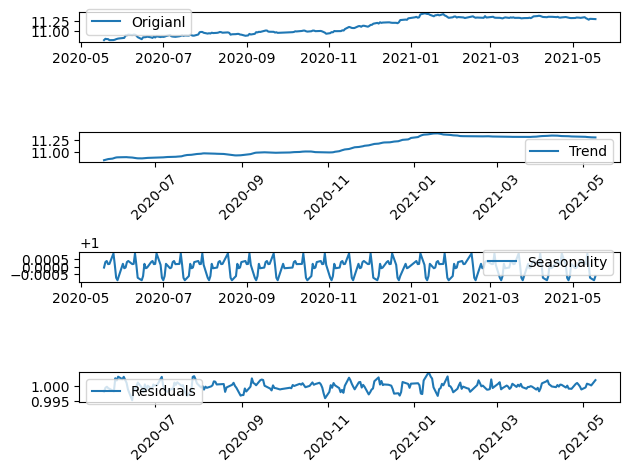

In [24]:
plt.subplot(411)
plt.plot(ts_log, label='Origianl')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.tight_layout()

In [25]:
residual.count()

238

In [26]:
residual.isna()

Date
2020-05-18    True
2020-05-19    True
2020-05-20    True
2020-05-21    True
2020-05-22    True
              ... 
2021-05-12    True
2021-05-13    True
2021-05-14    True
2021-05-17    True
2021-05-18    True
Name: resid, Length: 250, dtype: bool

In [27]:
residual.isna().sum()

12

In [28]:
residual.dropna(inplace=True)

In [29]:
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -7.122093e+00
p-value                        3.699873e-10
#Lags Used                     1.200000e+01
Number of Observations Used    2.250000e+02
Critical Value (1%(           -3.459752e+00
Critical Value (5%(           -2.874473e+00
Critical Value (10%(          -2.573663e+00
dtype: float64


decomposition을 통해 trend와 seasonality를 제거하고 나니 p-value값이 매우 작은 값으로 떨어졌으며, 해당 데이터가 stationary하다고 판단할 수 있겠습니다.

## STEP 4 : 학습, 테스트 데이터셋 생성
- 학습, 테스트 데이터셋 분리

In [30]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

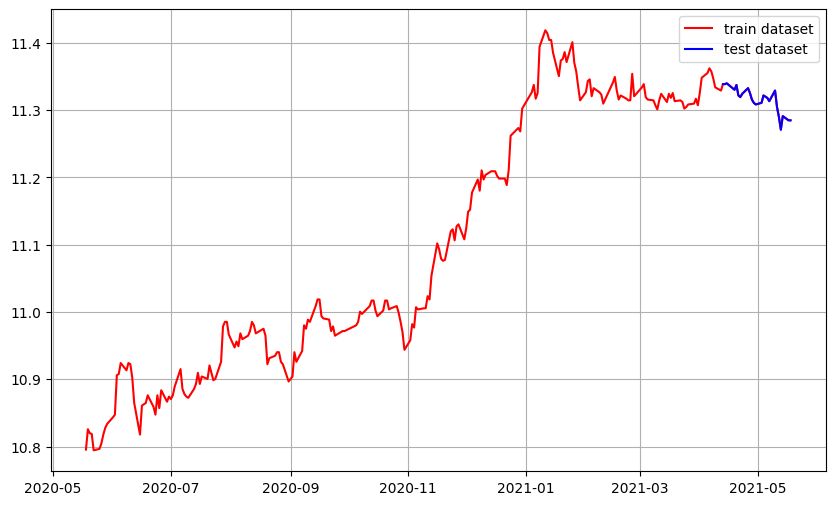

In [31]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='train dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## STEP 5 : 적정 ARIMA 모수 찾기
- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

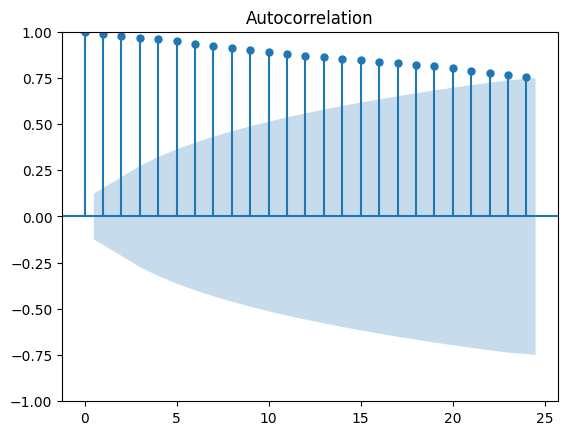

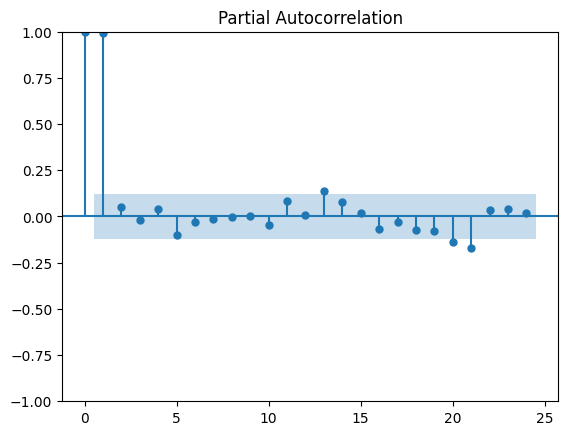

In [33]:
plot_acf(ts_log)
plot_pacf(ts_log)
plt.show()

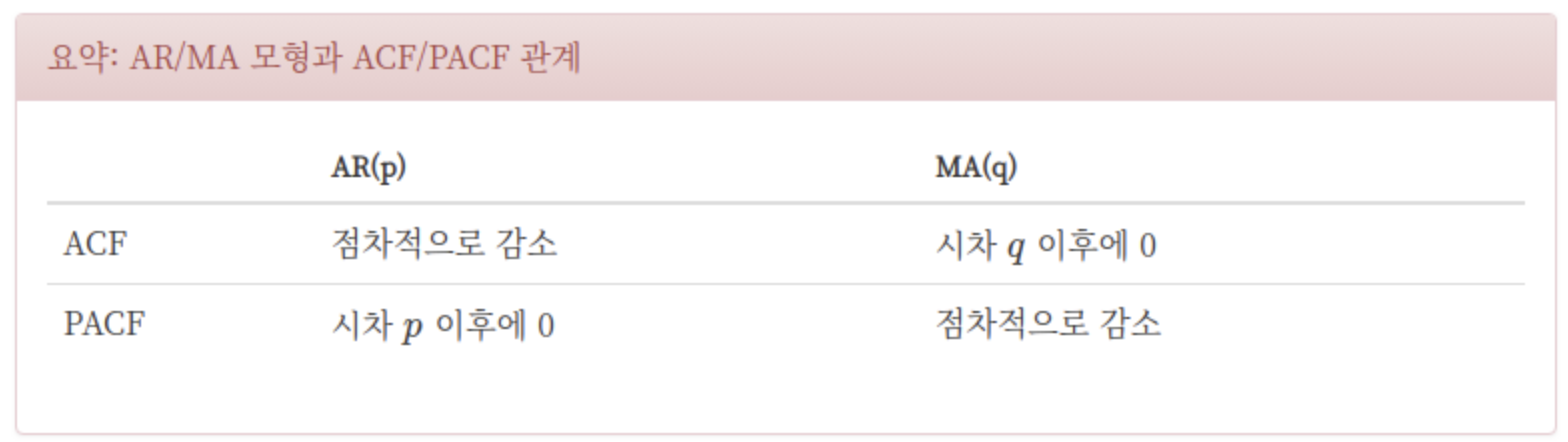

ACF와 PACF 그래프 경향을 참고했을 때 p=2, q=0으로 예상됩니다.

<AxesSubplot: title={'center': 'Difference 1st'}, xlabel='Date'>

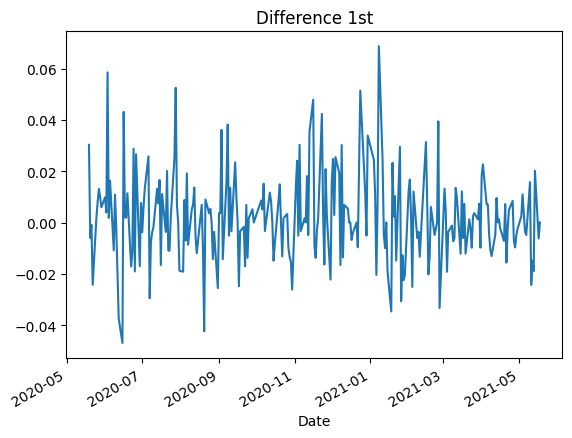

In [34]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title="Difference 1st")

In [35]:
augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%(           -3.456996e+00
Critical Value (5%(           -2.873266e+00
Critical Value (10%(          -2.573019e+00
dtype: float64


p-value 값이 매우 낮은 값으로 나타났으며 1차 차분만으로 stationary하게 변환된 것을 확인할 수 있습니다.

1차 차분 이후 stationary한 경향이 확인되어 d=1로 예상됩니다. 

## STEP 6 : ARIMA 모델 훈련과 테스트
- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

In [36]:
from statsmodels.tsa.arima.model import ARIMA

In [37]:
# Build Test Model

In [38]:
model_arima210 = ARIMA(train_data, order=(2, 1, 0))
fit_210 = model_arima210.fit()

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
print(fit_210.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 583.501
Date:                Mon, 21 Nov 2022   AIC                          -1161.003
Time:                        22:29:59   BIC                          -1150.768
Sample:                             0   HQIC                         -1156.871
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0367      0.062      0.592      0.554      -0.085       0.158
ar.L2         -0.0112      0.076     -0.147      0.883      -0.160       0.138
sigma2         0.0003   2.47e-05     12.961      0.0

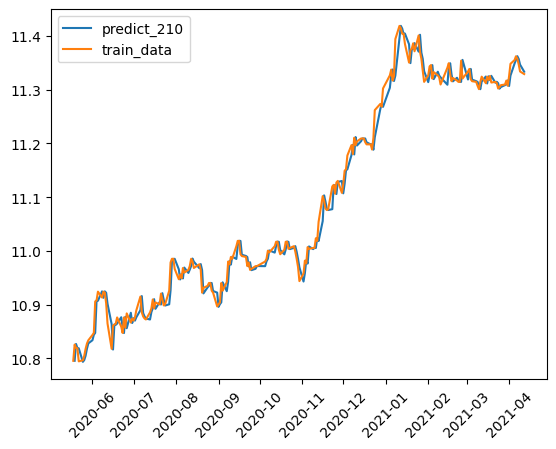

In [40]:
pred_210 = fit_210.predict()
pred_210 = pred_210.drop(pred_210.index[0])
plt.plot(pred_210, label='predict_210')
plt.plot(train_data, label='train_data')
plt.xticks(rotation =45)
plt.legend()

train data와 predict data가 상당히 일치하는 것을 확인할 수 있습니다.  

In [41]:
# Forecast : 결과가 fc에 담깁니다. 
fc_210 = fit_210.forecast(len(test_data), alpha=0.05)  # 95% conf

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
fc_210

225    11.328973
226    11.329026
227    11.329028
228    11.329027
229    11.329027
230    11.329027
231    11.329027
232    11.329027
233    11.329027
234    11.329027
235    11.329027
236    11.329027
237    11.329027
238    11.329027
239    11.329027
240    11.329027
241    11.329027
242    11.329027
243    11.329027
244    11.329027
245    11.329027
246    11.329027
247    11.329027
248    11.329027
249    11.329027
Name: predicted_mean, dtype: float64

In [43]:
test_data.index

DatetimeIndex(['2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-19', '2021-04-20', '2021-04-21', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30', '2021-05-03', '2021-05-04',
               '2021-05-06', '2021-05-07', '2021-05-10', '2021-05-11',
               '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-17',
               '2021-05-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [44]:
# fc_series = pd.Series(fc, index=test_data.index)   # 에러발생 원인 추가 파악 필요
fc_series = pd.Series(fc_210)
fc_series.index = test_data.index

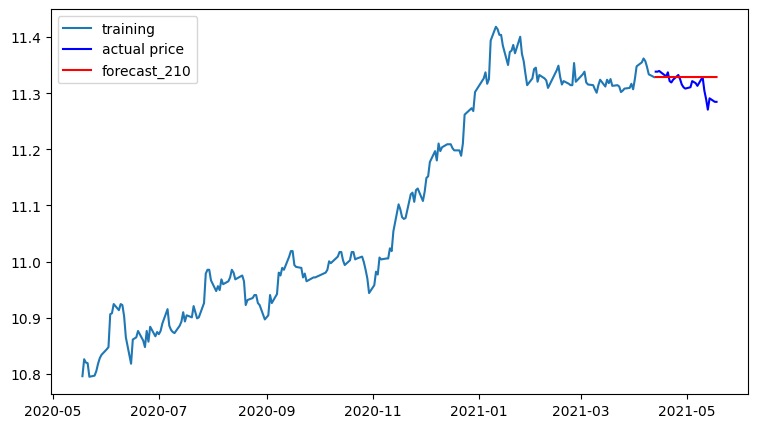

In [45]:
# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='forecast_210')
plt.legend()
plt.show()

이번에는 auto_arima를 활용하여 적정 p,d,q 값을 찾아보는 작업도 수행해 보겠습니다. 

In [46]:
from pmdarima.arima import auto_arima

model_arima= auto_arima(train_data,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(train_data)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1166.730, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1164.794, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1162.954, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1161.615, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1164.792, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1162.816, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1160.941, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1159.493, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1162.974, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1160.969, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1159.385, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1157.129, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1161.558, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1159.560, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1157.224, Time=0.10

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

auto_arima 방법으로 도출된 p,d,q 값은 ACI값이 가장 작은 (0,1,0)으로 나왔습니다. (0,1,0) 값으로 다시 training 후 결과값을 살펴 보도록 하겠습니다.

In [47]:
arima_010 = ARIMA(train_data, order=(0, 1, 0))
fit_010 = arima_010.fit()
print(fit_010.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 583.363
Date:                Mon, 21 Nov 2022   AIC                          -1164.726
Time:                        22:30:01   BIC                          -1161.314
Sample:                             0   HQIC                         -1163.349
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   2.33e-05     13.751      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                22.25
Prob(Q):                              0.80   Pr

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


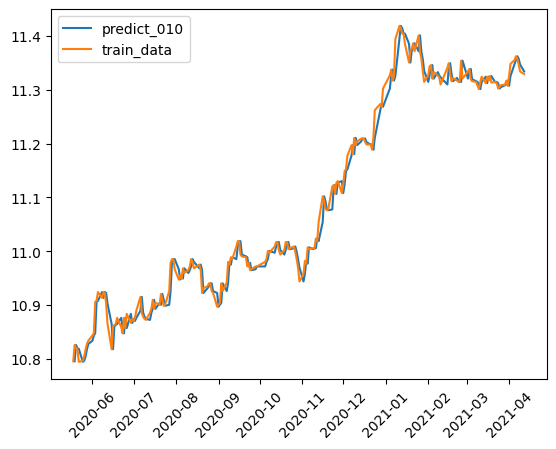

In [48]:
pred_010 = fit_010.predict()
pred_010 = pred_010.drop(pred_010.index[0])
plt.plot(pred_010, label='predict_010')
plt.plot(train_data, label='train_data')
plt.xticks(rotation =45)
plt.legend()

In [49]:
arima_010 = ARIMA(train_data, order=(0, 1, 0))
fit_010 = arima_010.fit() 

# Forecast : 결과가 fc에 담깁니다. 
fc = fit_010.forecast(len(test_data), alpha=0.05)  # 95% conf

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is availab

In [50]:
fc_series = pd.Series(fc)
fc_series.index = test_data.index

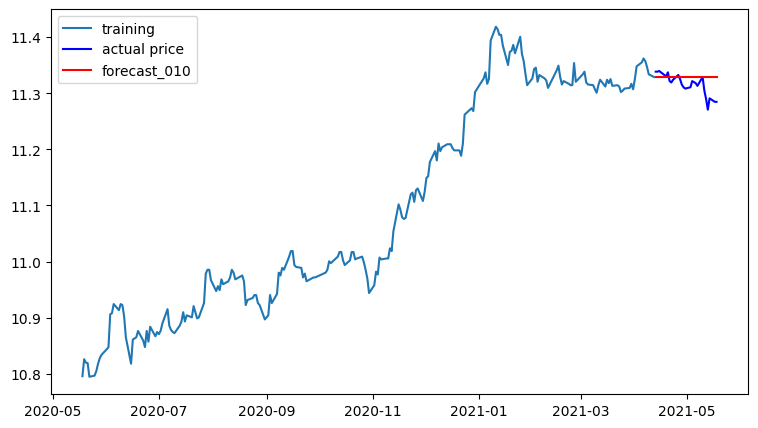

In [51]:
# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='forecast_010')
plt.legend()
plt.show()

In [52]:
# 오차 확인
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  3509600.000000066
MAE:  1408.0000000000023
RMSE:  1873.3926443754567
MAPE: 1.74%


MAPE 값이 1.74%으로 매우 작은 오차 결과치가 도출되었습니다. 

In [53]:
def forecast_one_step():
    fc, conf_int = model_arima.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [54]:
# 예측을 1-step 씩 수행하기 
forecasts = []
y_pred1 = []
pred_upper = []
pred_lower = []

for i, new_ob in enumerate(test_data):
    fc, conf = forecast_one_step()
    y_pred1.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_arima.update(new_ob)

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
y_pred1 = pd.DataFrame(y_pred1, columns=['predctions'])
y_pred1.index = test_data.index

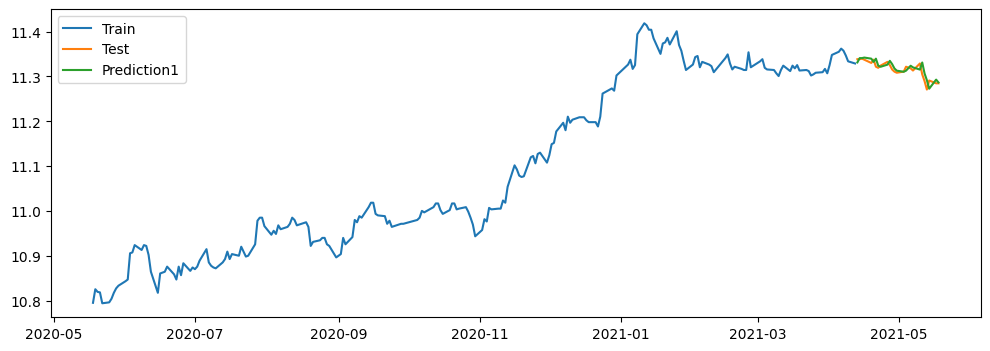

In [56]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train_data, label='Train')        # 훈련 데이터
plt.plot(test_data, label='Test')          # 테스트 데이터
plt.plot(y_pred1, label='Prediction1')  # 예측 데이터
plt.legend()
plt.show()

In [57]:
# 오차 확인
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(y_pred1))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(y_pred1))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(y_pred1)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(y_pred1['predctions']) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  818955.6996124398
MAE:  730.9358992722316
RMSE:  904.9617116831186
MAPE: 0.90%


## STEP 7 : 다른 주식 종목 예측해 보기
- 관심 종목을 골라 위 STEP 1~6의 과정을 반복해 보기

### - MSFT 주가 예측하기

### (1) 시계열 데이터 준비

In [58]:
import yfinance as yf
df_msft = yf.download('MSFT', start='2021-11-20', end='2022-11-20')
df_ba = yf.download('BA', start='2021-11-20', end='2022-11-20')
df_bti = yf.download('BTI', start='2021-11-20', end='2022-11-20')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [59]:
# df_msft = pd.read_csv('/Users/joowanha/PycharmProjects/AIFFEL/stock_prediction/MSFT.csv', index_col='Date', parse_dates=True)

In [60]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-22 to 2022-11-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [61]:
df_ba.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-22 to 2022-11-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [62]:
df_bti.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-22 to 2022-11-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [63]:
df_msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-22,344.619995,349.670013,339.549988,339.829987,336.675293,31031100
2021-11-23,337.049988,339.450012,333.559998,337.679993,334.545258,30427600
2021-11-24,336.279999,338.160004,333.910004,337.910004,334.773132,21661300
2021-11-26,334.350006,337.929993,328.119995,329.679993,326.619476,24217200
2021-11-29,334.940002,339.029999,334.739990,336.630005,333.505035,28563500


In [64]:
df_msft.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [65]:
# Time Series 생성
ts_msft = df_msft['Close']
ts_ba = df_ba['Close']
ts_bti = df_bti['Close']

### (2) 각종 전처리 수행

In [66]:
# log 변환
ts_log_msft = np.log(ts_msft)
ts_log_ba = np.log(ts_ba)
ts_log_bti = np.log(ts_bti)

### (3) 시계열 안정성 분석

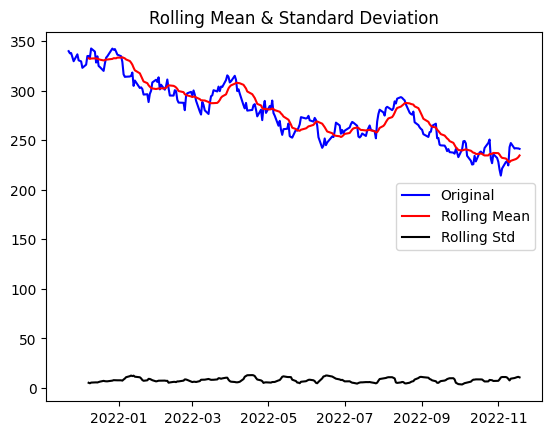

In [67]:
plot_rolling_statistics(ts_msft, window=12)

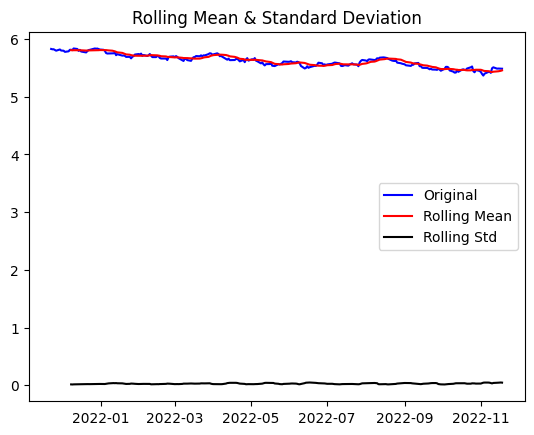

In [68]:
plot_rolling_statistics(ts_log_msft, window=12)

In [69]:
augmented_dickey_fuller_test(ts_log_msft)

Results of Dickey-Fuller Test:
Test Statistic                  -1.864042
p-value                          0.349161
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%(             -3.456781
Critical Value (5%(             -2.873172
Critical Value (10%(            -2.572969
dtype: float64


p-value값이 0.34 > 0.05 커서 stationary 하다고 보기 어렵습니다.

In [70]:
decomposition = seasonal_decompose(ts_log_msft, model='multiplicative', period = 12)

In [71]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

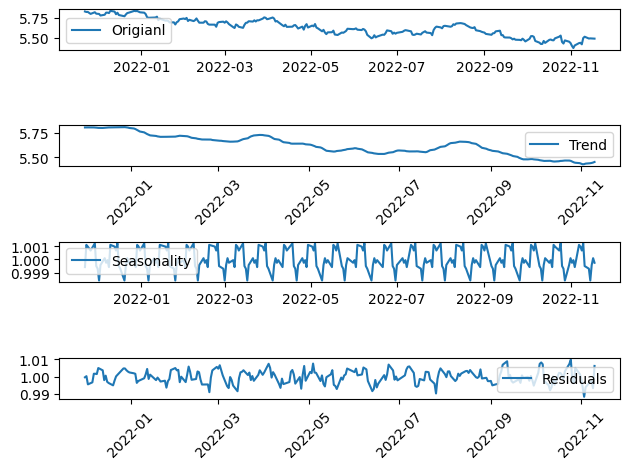

In [72]:
plt.subplot(411)
plt.plot(ts_log_msft, label='Origianl')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.tight_layout()

In [73]:
residual.count()

239

In [74]:
residual.dropna(inplace=True)

In [75]:
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -7.018821e+00
p-value                        6.624540e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.240000e+02
Critical Value (1%(           -3.459885e+00
Critical Value (5%(           -2.874531e+00
Critical Value (10%(          -2.573694e+00
dtype: float64


p-value값을 통해 seasonality와 trend를 제거하고 난뒤 해당 데이터는 stationary 할 수 있겠습니다.

### (4) 학습, 테스트 데이터셋 생성

In [76]:
train_msft, test_msft = ts_log_msft[:int(len(ts_log_msft)*0.9)], ts_log_msft[int(len(ts_log_msft)*0.9):]

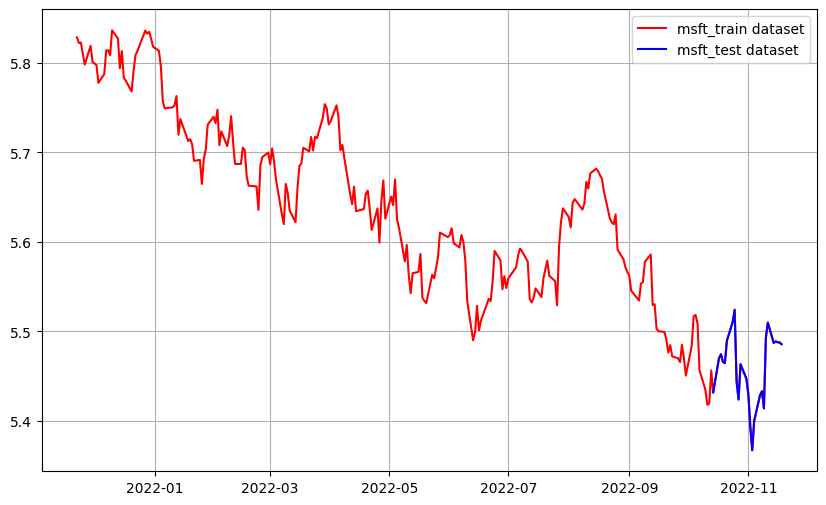

In [77]:
# msft 주가 그래프
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log_msft, c='r', label='msft_train dataset')
plt.plot(test_msft, c='b', label='msft_test dataset')
plt.legend()

### (5) 적정 ARIMA 모수 찾기

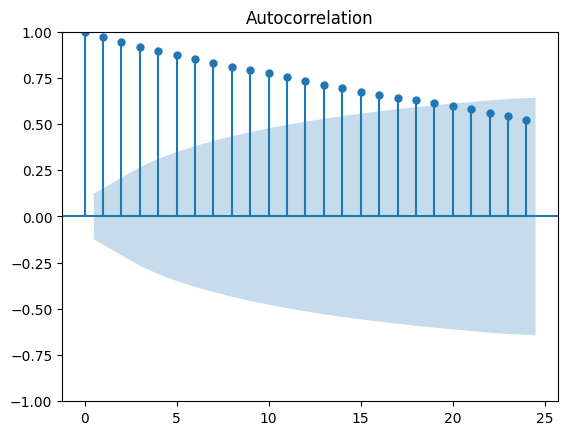

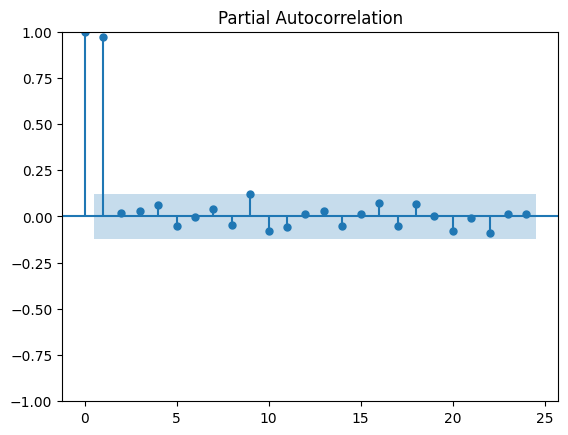

In [78]:
plot_acf(ts_log_msft)
plot_pacf(ts_log_msft, method='ywm')
plt.show()

그래프를 통해 p,q = (1,0) 으로 산정하도록 하겠습니다.

<AxesSubplot: title={'center': 'MSFT Difference 1st'}, xlabel='Date'>

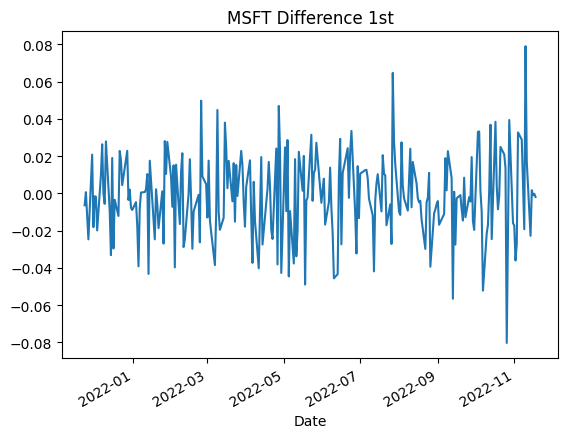

In [79]:
# 1차 차분 구하기
diff_1 = ts_log_msft.diff(periods=1).iloc[1:]
diff_1.plot(title="MSFT Difference 1st")

In [80]:
augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.631574e+01
p-value                        3.163549e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%(           -3.456888e+00
Critical Value (5%(           -2.873219e+00
Critical Value (10%(          -2.572994e+00
dtype: float64


1차 차분결과 p-value값이 매우 작은 값으로 도출되어 stationary하다고 판단할 수 있겠습니다.
d = 1

In [81]:
# MSFT 자동 d 값 추정
from pmdarima.arima import ndiffs
kpss_diffs = ndiffs(train_msft, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(train_msft, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"MSFT 추정된 차수 d = {n_diffs}")

MSFT 추정된 차수 d = 1


### (6) ARIMA 모델 훈련과 테스트

In [82]:
import pmdarima as pm

In [83]:
model = ARIMA(train_msft, order=(1, 1, 0))
fitted_m1 = model.fit()

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [84]:
print(fitted_m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 548.275
Date:                Mon, 21 Nov 2022   AIC                          -1092.550
Time:                        22:30:05   BIC                          -1085.727
Sample:                             0   HQIC                         -1089.796
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0369      0.067     -0.554      0.580      -0.168       0.094
sigma2         0.0004   4.19e-05     10.442      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.01   Jarque-

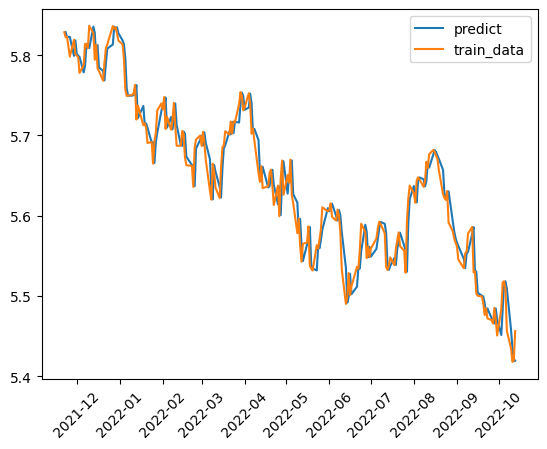

In [85]:
fitted_m1 = fitted_m1.predict()
fitted_m1 = fitted_m1.drop(fitted_m1.index[0])
plt.plot(fitted_m1, label='predict')
plt.plot(train_msft, label='train_data')
plt.xticks(rotation =45)
plt.legend()

In [86]:
model_msft = pm.auto_arima(train_msft, trace=True, error_action='ignore', start_p=0,start_q=0,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
model_msft.fit(train_msft)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1093.664, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1092.110, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1090.228, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1090.240, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1092.093, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1088.626, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1087.925, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1090.153, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1088.169, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1086.222, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1089.847, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1087.862, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1089.705, Time=0.17 sec

Best m

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [87]:
print(model_msft.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 548.832
Date:                Mon, 21 Nov 2022   AIC                          -1093.664
Time:                        22:30:06   BIC                          -1086.841
Sample:                             0   HQIC                         -1090.910
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0017      0.001     -1.190      0.234      -0.004       0.001
sigma2         0.0004   4.11e-05     10.599      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.43   Jarque-

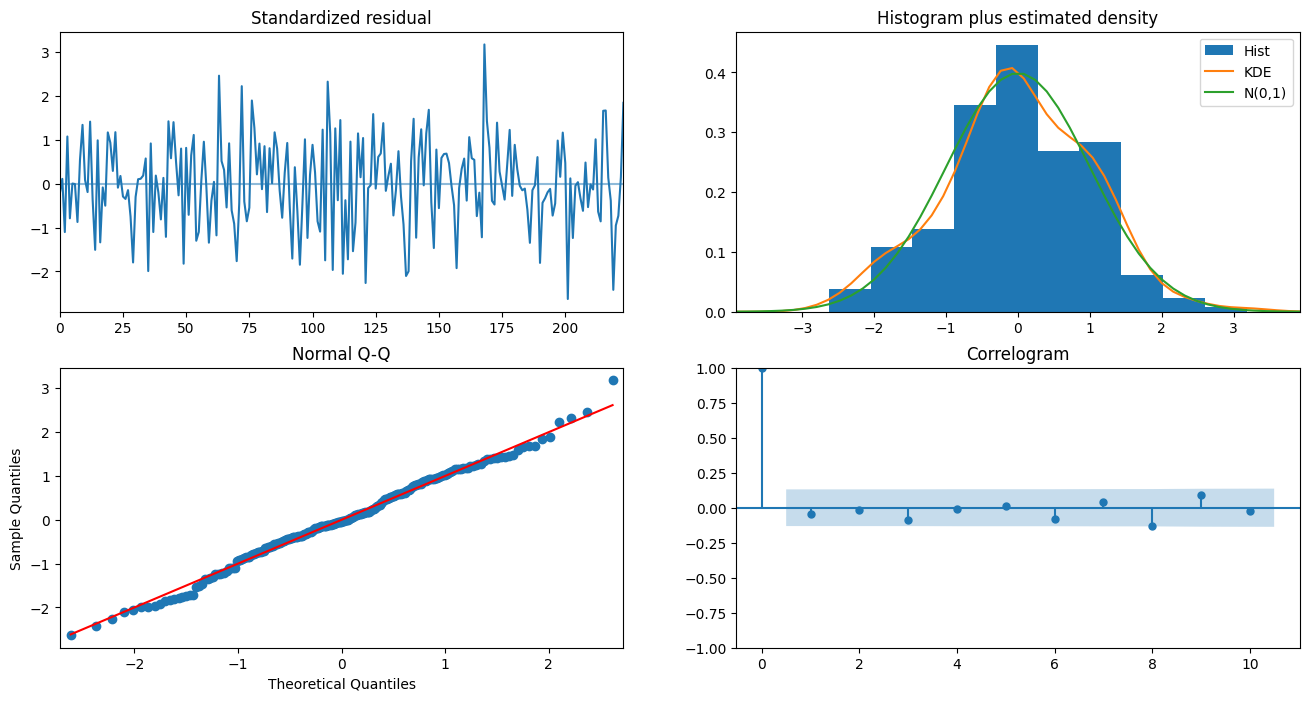

In [88]:
model_msft.plot_diagnostics(figsize=(16, 8))
plt.show()

In [89]:
# 테스트 데이터 개수만큼 예측
y_pred = model_msft.predict(n_periods=len(test_msft)) 

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [90]:
y_pred = pd.DataFrame(y_pred, columns=['prediction'])

In [91]:
y_pred.index = test_msft.index

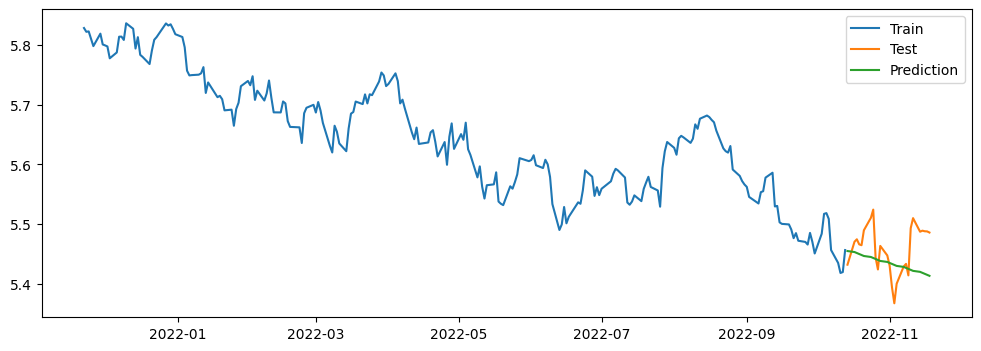

In [92]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train_msft, label='Train')        # 훈련 데이터
plt.plot(test_msft, label='Test')          # 테스트 데이터
plt.plot(y_pred, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [93]:
model2 = ARIMA(train_msft, order=(0, 1, 0))
fitted_m = model2.fit() 
fc = fitted_m.forecast(len(test_msft), alpha=0.05)  # 95% conf

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization

In [94]:
fc_series = pd.Series(fc)
fc_series.index = test_msft.index

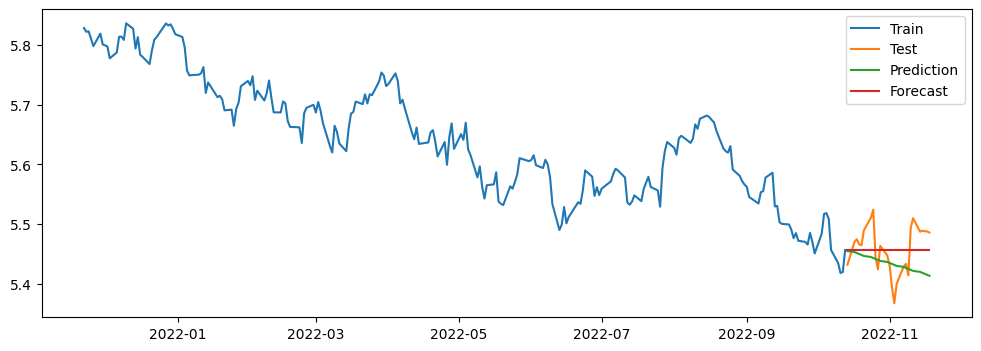

In [95]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train_msft, label='Train')        # 훈련 데이터
plt.plot(test_msft, label='Test')          # 테스트 데이터
plt.plot(y_pred, label='Prediction')  # 예측 데이터
plt.plot(fc_series, label='Forecast')  # 예측 데이터
plt.legend()
plt.show()

In [96]:
print("MSFT Calculated by Forecast")
mse = mean_squared_error(np.exp(test_msft), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_msft), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_msft), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_msft))/np.abs(np.exp(test_msft)))
print('MAPE: {:.2f}%'.format(mape*100))

MSFT Calculated by Forecast
MSE:  81.6764344473621
MAE:  7.7661520150991725
RMSE:  9.037501560019898
MAPE: 3.32%


In [97]:
print("MSFT Calculated by Prediction")
mse = mean_squared_error(np.exp(test_msft), np.exp(y_pred))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_msft), np.exp(y_pred))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_msft), np.exp(y_pred)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(y_pred['prediction']) - np.exp(test_msft))/np.abs(np.exp(test_msft)))
print('MAPE: {:.2f}%'.format(mape*100))

MSFT Calculated by Prediction
MSE:  126.84953214515772
MAE:  9.051296366139129
RMSE:  11.262749759501794
MAPE: 3.80%


In [98]:
# 1-step prediction 적용
def forecast_one_step(model):
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [99]:
forecasts = []
y_pred2 = []
pred_upper = []
pred_lower = []

for i, new_ob in enumerate(test_msft):
    fc, conf = forecast_one_step(model_msft)
    y_pred2.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_msft.update(new_ob)

# 추가 5일 예측  
y_pred3 = []
for i in range(5):
    fc, conf = forecast_one_step(model_msft)
    y_pred3.append(fc)
    # pred_upper.append(conf[1])
    # pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_msft.update(y_pred3[i])

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [100]:
y_pred2 = pd.DataFrame(y_pred2, columns=['predictions'])
y_pred2.index = test_msft.index

In [101]:
y_pred3 = pd.DataFrame(y_pred3, columns=['predictions'])
y_pred3.index = pd.DatetimeIndex(['2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-24', '2022-11-25'])

In [102]:
# y_pred2.index = pd.DatetimeIndex(['2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
#                '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
#                '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-31',
#                '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
#                '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
#                '2022-11-11', '2022-11-14', '2022-11-15', '2022-11-16',
#                '2022-11-17', '2022-11-18', '2022-11-21', '2022-11-22',
#                '2022-11-23', '2022-11-24', '2022-11-25'])

In [103]:
print(model_msft.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  256
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 613.390
Date:                Mon, 21 Nov 2022   AIC                          -1222.780
Time:                        22:30:07   BIC                          -1215.697
Sample:                             0   HQIC                         -1219.931
                                - 256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0014      0.001     -1.007      0.314      -0.004       0.001
sigma2         0.0005   3.57e-05     13.357      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.36   Jarque-

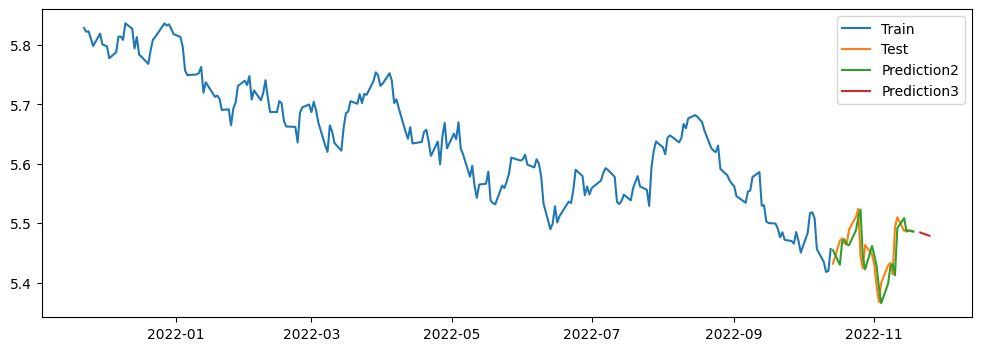

In [104]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train_msft, label='Train')        # 훈련 데이터
plt.plot(test_msft, label='Test')          # 테스트 데이터
plt.plot(y_pred2, label='Prediction2')  # 예측 데이터
plt.plot(y_pred3, label='Prediction3')  # 예측 데이터
plt.legend()
plt.show()

In [105]:
print("MSFT Calculated by 1-Step Prediction")
mse = mean_squared_error(np.exp(test_msft), np.exp(y_pred2))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_msft), np.exp(y_pred2))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_msft), np.exp(y_pred2)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(y_pred2['predictions']) - np.exp(test_msft))/np.abs(np.exp(test_msft)))
print('MAPE: {:.2f}%'.format(mape*100))

MSFT Calculated by 1-Step Prediction
MSE:  50.496120090191
MAE:  5.219432782135707
RMSE:  7.106062207030769
MAPE: 2.23%


1-step prediction의 MAPE가 현저히 적게 나온 것을 확인할 수 있습니다.

추가로 향후 5일간의 주가를 예상해보니 일부 하락 추세로 확인되었습니다. 진짜 예측이 맞을지 한 주동안 지켜보도록 하겠습니다. 

### - BA 주가 예측하기

In [106]:
train_ba, test_ba = ts_log_ba[:int(len(ts_log_ba)*0.9)], ts_log_ba[int(len(ts_log_ba)*0.9):]

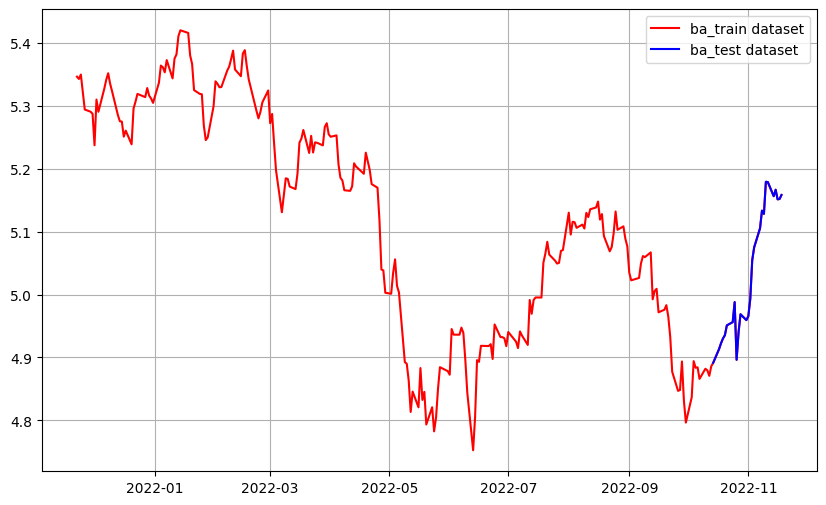

In [107]:
# ba 주가 그래프
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log_ba, c='r', label='ba_train dataset')
plt.plot(test_ba, c='b', label='ba_test dataset')
plt.legend()

<AxesSubplot: title={'center': 'BA Difference 1st'}, xlabel='Date'>

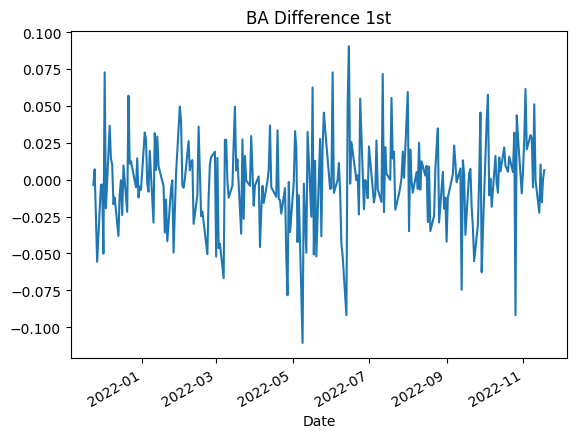

In [108]:
# 1차 차분 구하기
diff_ba = ts_log_ba.diff(periods=1).iloc[1:]
diff_ba.plot(title="BA Difference 1st")

In [109]:
augmented_dickey_fuller_test(diff_ba)

Results of Dickey-Fuller Test:
Test Statistic                -1.578733e+01
p-value                        1.112787e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%(           -3.456888e+00
Critical Value (5%(           -2.873219e+00
Critical Value (10%(          -2.572994e+00
dtype: float64


In [110]:
# BA 자동 d 값 추정
from pmdarima.arima import ndiffs
kpss_diffs = ndiffs(train_ba, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(train_ba, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"BA 추정된 차수 d = {n_diffs}")

BA 추정된 차수 d = 1


In [111]:
model_ba = pm.auto_arima(train_ba, trace=True, error_action='ignore', start_p=0,start_q=0,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
model_ba.fit(train_ba)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-930.155, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-928.156, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-928.234, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-927.773, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-928.156, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-926.163, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-926.901, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-926.139, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-928.018, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-924.407, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-926.427, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-924.098, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-927.605, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-926.545, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-924.149, Time=0.15 sec

Best mode

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [112]:
# 예측을 1-step 씩 수행하기 
forecasts = []
y_pred2 = []
pred_upper = []
pred_lower = []

for i, new_ob in enumerate(test_ba):
    fc, conf = forecast_one_step(model_ba)
    y_pred2.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_ba.update(new_ob)
    
    
# 추가 5일 예측  
y_pred3 = []
for i in range(5):
    fc, conf = forecast_one_step(model_ba)
    y_pred3.append(fc)
    # pred_upper.append(conf[1])
    # pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_ba.update(y_pred3[i])

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [113]:
y_pred2 = pd.DataFrame(y_pred2, columns=['predictions'])
y_pred2.index = test_ba.index

In [114]:
y_pred3 = pd.DataFrame(y_pred3, columns=['predictions'])
y_pred3.index = pd.DatetimeIndex(['2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-24', '2022-11-25'])

In [115]:
print(model_ba.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  256
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 533.834
Date:                Mon, 21 Nov 2022   AIC                          -1063.668
Time:                        22:30:09   BIC                          -1056.585
Sample:                             0   HQIC                         -1060.819
                                - 256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0008      0.002     -0.402      0.688      -0.004       0.003
sigma2         0.0009   6.41e-05     13.870      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.01   Jarque-

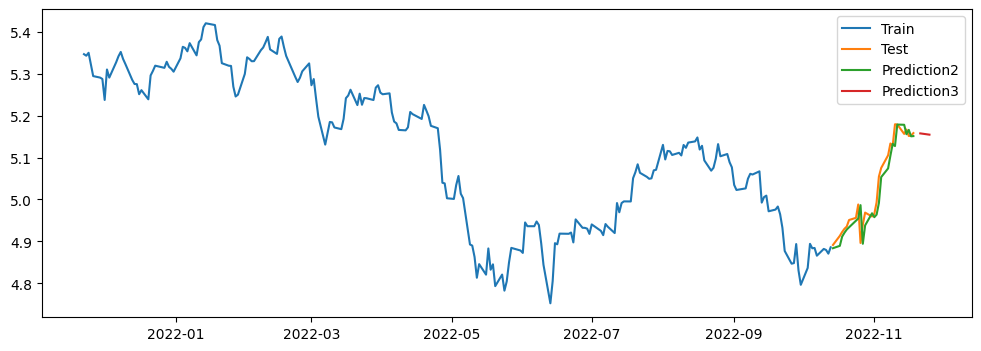

In [116]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train_ba, label='Train')        # 훈련 데이터
plt.plot(test_ba, label='Test')          # 테스트 데이터
plt.plot(y_pred2, label='Prediction2')  # 예측 데이터
plt.plot(y_pred3, label='Prediction3')  # 예측 데이터
plt.legend()
plt.show()

In [117]:
print("BA Calculated by 1-Step Prediction")
mse = mean_squared_error(np.exp(test_ba), np.exp(y_pred2))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_ba), np.exp(y_pred2))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_ba), np.exp(y_pred2)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(y_pred2['predictions']) - np.exp(test_ba))/np.abs(np.exp(test_ba)))
print('MAPE: {:.2f}%'.format(mape*100))

BA Calculated by 1-Step Prediction
MSE:  20.958655550730445
MAE:  3.400983351826263
RMSE:  4.578062423201593
MAPE: 2.24%


추가로 향후 5일간의 주가를 예상해보니 일부 하락 추세로 확인되었습니다. 진짜 예측이 맞을지 한 주동안 지켜보도록 하겠습니다. 

### - BTI 주가 예측하기

In [118]:
train_bti, test_bti = ts_log_bti[:int(len(ts_log_bti)*0.9)], ts_log_bti[int(len(ts_log_bti)*0.9):]

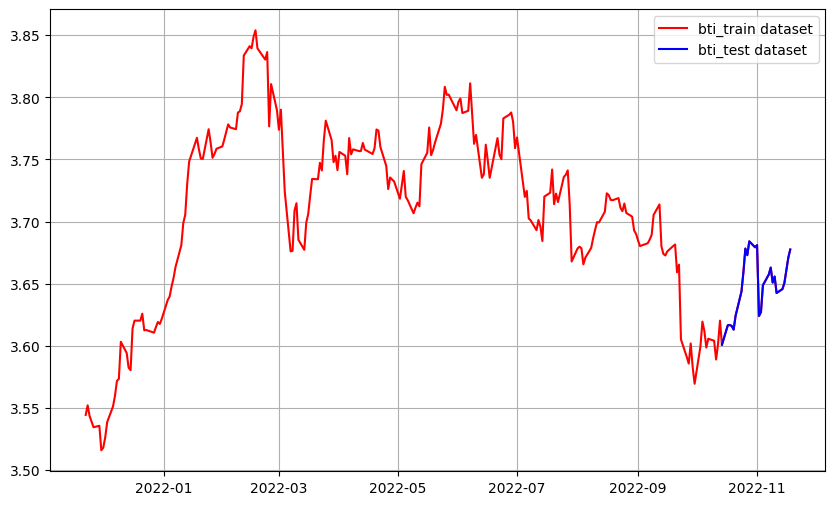

In [119]:
# bti 주가 그래프
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log_bti, c='r', label='bti_train dataset')
plt.plot(test_bti, c='b', label='bti_test dataset')
plt.legend()

In [120]:
# BTI 자동 d 값 추정
from pmdarima.arima import ndiffs
kpss_diffs = ndiffs(train_bti, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(train_bti, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"BTI 추정된 차수 d = {n_diffs}")

BTI 추정된 차수 d = 1


In [121]:
model_bti = pm.auto_arima(train_bti, trace=True, error_action='ignore', start_p=0,start_q=0,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
model_bti.fit(train_bti)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1213.298, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1211.304, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1209.306, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1207.787, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1211.304, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1209.304, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1207.306, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1205.454, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1209.306, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1207.306, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1205.306, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1204.023, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1207.791, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1205.793, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1203.793, Time=0.11

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [122]:
# 예측을 1-step 씩 수행하기 
forecasts = []
y_pred2 = []
pred_upper = []
pred_lower = []

for i, new_ob in enumerate(test_bti):
    fc, conf = forecast_one_step(model_bti)
    y_pred2.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_bti.update(new_ob)

# 추가 5일 예측  
y_pred3 = []
for i in range(5):
    fc, conf = forecast_one_step(model_bti)
    y_pred3.append(fc)
    # pred_upper.append(conf[1])
    # pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model_bti.update(y_pred3[i])

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [123]:
y_pred2 = pd.DataFrame(y_pred2, columns=['predictions'])
y_pred2.index = test_bti.index

In [124]:
y_pred3 = pd.DataFrame(y_pred3, columns=['predictions'])
y_pred3.index = pd.DatetimeIndex(['2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-24', '2022-11-25'])

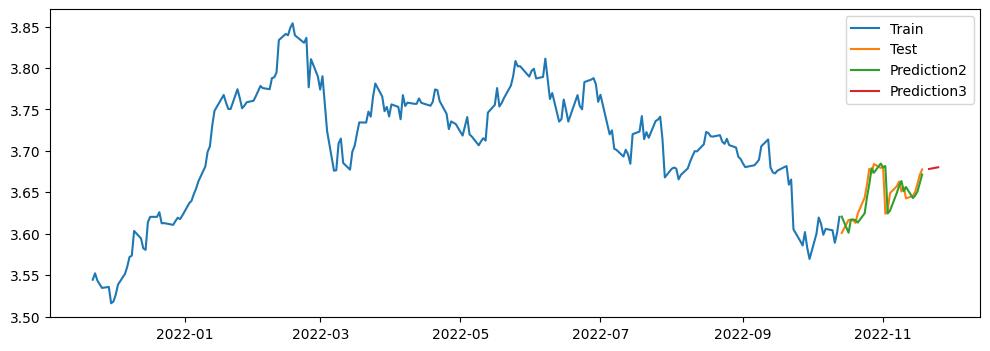

In [125]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train_bti, label='Train')        # 훈련 데이터
plt.plot(test_bti, label='Test')          # 테스트 데이터
plt.plot(y_pred2, label='Prediction2')  # 예측 데이터
plt.plot(y_pred3, label='Prediction3')  # 예측 데이터
plt.legend()
plt.show()

In [126]:
print("BTI Calculated by 1-Step Prediction")
mse = mean_squared_error(np.exp(test_bti), np.exp(y_pred2))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_bti), np.exp(y_pred2))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_bti), np.exp(y_pred2)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(y_pred2['predictions']) - np.exp(test_bti))/np.abs(np.exp(test_bti)))
print('MAPE: {:.2f}%'.format(mape*100))

BTI Calculated by 1-Step Prediction
MSE:  0.3610428551180766
MAE:  0.420736973844091
RMSE:  0.6008684174743057
MAPE: 1.10%


추가로 향후 5일간의 주가를 예상해보니 상승 추세로 확인되었습니다. 진짜 예측이 맞을지 한 주동안 지켜보도록 하겠습니다. 

### [회고]  
 - ARIMA 최적 p,d,q 찾는 방법 확인 필요그래프를 기준으로는 (2,1,0)이 도출되었으나, auto_arima로는 (0,1,0)이 나와 추가 확인이 필요할 것 같습니다. 
 - SARIMAX 결과 report 해석 방법에 대해 추가 스터디를 통해 확인이 필요합니다. 
 - predict와 forecast의 차이 이해 필요 (predict 값은 실제 그래프와 유사한 형태로 나오나 forecast는 평균값(직선 형태)으로 도출됨. 직선 형태로 결과가 나오면 예측의 의미가 있는 것인지 의문이 듭니다. forecast 활용 방법에 대해 좀 더 연구가 필요합니다. 
 - 노드에 등록된 "fc_series = pd.Series(fc, index=test_data.index)" 으로 fc 값을 도출시 NaN값이 나와서 오류가 발생했습니다. 원인 별도 파악 필요한 상황입니다. 


[참고자료]  
- 21년 AIFFEL 프로젝트 : https://meissa.tistory.com/51
- forecast ValueWarning 에러처리 방법 :  https://lovelydiary.tistory.com/436
- auto-arima를 잘 쓰기 위한 배경지식   
   1) https://assaeunji.github.io/statistics/2021-09-08-arimapdq/  
   2) https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/  
- predict() 와 forecast()의 차이 : https://blog.naver.com/PostView.naver?blogId=naan_ace&logNo=221158873230&redirect=Dlog&widgetTypeCall=true&directAccess=false